Table of Contents
1. [Defining Objective Function](#section1)<br>
2. [Defining Domain](#section2)<br>
3. [Hyperoptimization Algorithm](#section3)<br>
4. [Storing History](#section4)<br>
5. [Running the Optimization](#section5)<br>
6. [Results](#section6)<br>
7. [Choosing better domain Space](#section7)<br>
8. [Returning more values from objective function](#section8)

In [104]:
# Importing libraries
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

### 1. Defining Objective Function <a id=section1></a>

In [105]:
def objective(x):
    """Objective function to minimize"""
    
    # Create the polynomial object
    f = np.poly1d([1, -2, -28, 28, 12, -26, 100, 112])

    # Return the value of the polynomial
    return f(x) * 0.05

-1083.742969491826
5.026402640264026
Min of -1083.7430 occurs at 5.0264


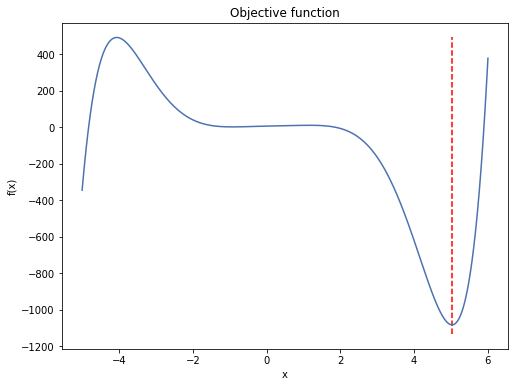

In [106]:
x = np.linspace(-5,6,10000)
y = objective(x)
min_y = min(y)
min_x = x[np.argmin(y)]
print(min_y)
print(min_x)

#plotting the data
plt.figure(figsize = (8,6))
plt.style.use('seaborn-deep')
plt.title('Objective function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.vlines(min_x, min(y)-50, max(y), linestyle = '--', colors = 'r')
plt.plot(x,y);

print('Min of %0.4f occurs at %0.4f' %(min(y),min_x))

### 2. Defining Domain <a id=section2></a>

In [107]:
#define space for search
space = hp.uniform('x', 4, 6)

### 3. Hyper Optimization Algorithm <a id=section3></a>

In [108]:
from hyperopt import rand, tpe

# Create the algorithms
tpe_algo = tpe.suggest
rand_algo = rand.suggest

### 4. History <a id=section4></a>

In [109]:
from hyperopt import Trials

# Create two trials objects
tpe_trials = Trials()
rand_trials = Trials()

### 5. Run the Optimization <a id=section5></a>

In [110]:
from hyperopt import fmin

# Run 2000 evals with the tpe algorithm
tpe_best = fmin(fn=objective, space=space, algo=tpe_algo, trials=tpe_trials, 
                max_evals=1000, rstate= np.random.RandomState(50))

print(tpe_best)

# Run 2000 evals with the random algorithm
rand_best = fmin(fn=objective, space=space, algo=rand_algo, trials=rand_trials, 
                 max_evals=1000, rstate= np.random.RandomState(50))

100%|██████████| 1000/1000 [00:07<00:00, 138.67it/s, best loss: -1083.7429073855042]
{'x': 5.026898292290859}
100%|██████████| 1000/1000 [00:01<00:00, 691.38it/s, best loss: -1083.742314515434]


In [111]:
# Print out information about losses
print('Minimum loss attained with TPE:    {:.4f}'.format(tpe_trials.best_trial['result']['loss']))
print('Minimum loss attained with random: {:.4f}'.format(rand_trials.best_trial['result']['loss']))
print('Actual minimum of f(x):            {:.4f}'.format(min_y))

# Print out information about number of trials
print('\nNumber of trials needed to attain minimum with TPE:    {}'.format(tpe_trials.best_trial['misc']['idxs']['x'][0]))
print('Number of trials needed to attain minimum with random: {}'.format(rand_trials.best_trial['misc']['idxs']['x'][0]))

# Print out information about value of x
print('\nBest value of x from TPE:    {:.4f}'.format(tpe_best['x']))
print('Best value of x from random: {:.4f}'.format(rand_best['x']))
print('Actual best value of x:      {:.4f}'.format(min_x))

Minimum loss attained with TPE:    -1083.7429
Minimum loss attained with random: -1083.7423
Actual minimum of f(x):            -1083.7430

Number of trials needed to attain minimum with TPE:    434
Number of trials needed to attain minimum with random: 540

Best value of x from TPE:    5.0269
Best value of x from random: 5.0275
Actual best value of x:      5.0264


### 6. Results <a id=section6></a>

In [112]:
tpe_results = pd.DataFrame({'loss': [x['loss'] for x in tpe_trials.results], 'iteration': tpe_trials.idxs_vals[0]['x'],
                            'x': tpe_trials.idxs_vals[1]['x']})
                            
tpe_results.head()

,loss,iteration,x
0,348.280272,0,5.992343
1,-450.905538,1,5.721979
2,-834.120085,2,5.494357
3,-1050.418734,3,4.815298
4,-631.351094,4,4.015121


In [113]:
rand_results = pd.DataFrame({'loss': [x['loss'] for x in rand_trials.results], 
                            'iteration': rand_trials.idxs_vals[0]['x'],
                            'x': rand_trials.idxs_vals[1]['x']})
                            
rand_results.head()

,loss,iteration,x
0,348.280272,0,5.992343
1,-450.905538,1,5.721979
2,-834.120085,2,5.494357
3,-1050.418734,3,4.815298
4,-631.351094,4,4.015121


Text(0, 0.5, '$x$')

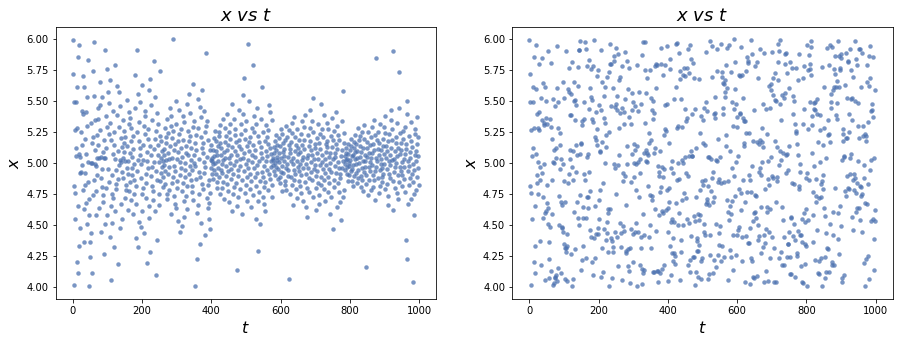

In [114]:
f, ax = plt.subplots(ncols=2, figsize=(15,5))
ax[0].scatter(tpe_results.iteration, tpe_results.x, s=20, linewidth=0.01, alpha=0.75)
ax[0].set_title('$x$ $vs$ $t$ ', fontsize=18)
ax[0].set_xlabel('$t$', fontsize=16)
ax[0].set_ylabel('$x$', fontsize=16)
ax[1].scatter(rand_results.iteration, rand_results.x, s=20, linewidth=0.01, alpha=0.75)
ax[1].set_title('$x$ $vs$ $t$ ', fontsize=18)
ax[1].set_xlabel('$t$', fontsize=16)
ax[1].set_ylabel('$x$', fontsize=16)

We can see that over time, the algorithm tended to try values closer to 4.9. The local minimum around -4 likely threw off the algorithm initially, but the points tend to cluster around the actual minimum as the algorithm progresses.

Clearly, the random algorithm is just "randomly" choosing the next set of values to try! There is no logical order here.

In [115]:
tpe_results = tpe_results.sort_values(by='loss', ascending=True).reset_index()
print('Best loss {} is evaluated at {} iteration in tpe.suggest algorithm'.format(tpe_results.loss[0], tpe_results.iteration[0]))

Best loss -1083.7429073855042 is evaluated at 434 iteration in tpe.suggest algorithm


In [116]:
rand_results = rand_results.sort_values(by='loss', ascending=True).reset_index()
print('Best loss {} is evaluated at {} iteration in rand.suggest algorithm'.format(rand_results.loss[0], rand_results.iteration[0]))

Best loss -1083.742314515434 is evaluated at 540 iteration in rand.suggest algorithm


### 7. Choosing better domain space <a id=section7></a>

In [117]:
# Normally distributed space
space = hp.normal('x', 4.9, 0.5)

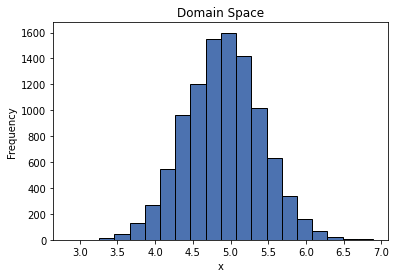

In [119]:
from hyperopt.pyll.stochastic import sample
samples = []

# Sample 10000 values from the range
for _ in range(10000):
    samples.append(sample(space))
    

# Histogram of the values
plt.hist(samples, bins = 20, edgecolor = 'black'); 
plt.xlabel('x'); plt.ylabel('Frequency'); plt.title('Domain Space');

Much closer to the true value! This would help both the random search and the TPE find the minimum quicker (for random search it would help because we are concentrating the possible values around the optimum).

### 8. Returning more value from the objective function <a id=section8></a>

In [120]:
from hyperopt import STATUS_OK
from timeit import default_timer as timer

In [121]:
def objective(x):
    """Objective function to minimize with smarter return values"""
    
    # Create the polynomial object
    f = np.poly1d([1, -2, -28, 28, 12, -26, 100])

    # Evaluate the function
    start = timer()
    loss = f(x) * 0.05
    end = timer()
    
    # Calculate time to evaluate
    time_elapsed = end - start
    
    results = {'loss': loss, 'status': STATUS_OK, 'x': x, 'time': time_elapsed}
    
    # Return dictionary
    return results

In [122]:
# New trials object
trials = Trials()

# Run 2000 evals with the tpe algorithm
best = fmin(fn=objective, space=space, algo=tpe_algo, trials=trials, 
                max_evals=2000, rstate= np.random.RandomState(120))

100%|██████████| 2000/2000 [00:19<00:00, 100.64it/s, best loss: -219.80120395524256]


In [123]:

results = trials.results
results[:2]

[{'loss': -189.3682041842684,
  'status': 'ok',
  'time': 6.898699939483777e-05,
  'x': 5.312379584994148},
 {'loss': -219.325099632915,
  'status': 'ok',
  'time': 0.00028618199939955957,
  'x': 4.8166084516702705}]

In [124]:

# Results into a dataframe
results_df = pd.DataFrame({'time': [x['time'] for x in results], 
                           'loss': [x['loss'] for x in results],
                           'x': [x['x'] for x in results],
                            'iteration': list(range(len(results)))})

# Sort with lowest loss on top
results_df = results_df.sort_values('loss', ascending = True)
results_df.head()

,time,loss,x,iteration
956,0.000037,-219.801204,4.878152,956
1316,0.000044,-219.801204,4.878111,1316
402,0.000033,-219.801204,4.878189,402
914,0.000038,-219.801203,4.878064,914
1954,0.000091,-219.801203,4.878222,1954


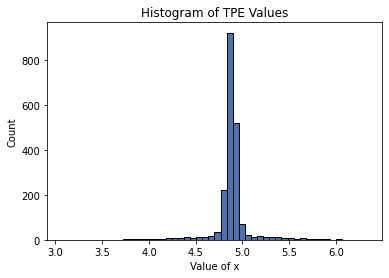

In [125]:
plt.hist(results_df['x'], bins = 50, edgecolor = 'k');
plt.title('Histogram of TPE Values'); plt.xlabel('Value of x'); plt.ylabel('Count');

Indeed the values of x evaluated cluster much closer to the optimum! The algorithm spend much more time around the best value than searching the domain space. We can compare this distribution to that attained with the TPE algorithm on the uniform domain using a Kernel Density Estimate Plot.

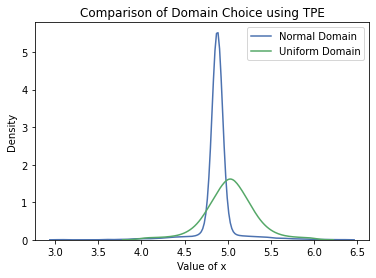

In [126]:
sns.kdeplot(results_df['x'], label = 'Normal Domain')
sns.kdeplot(tpe_results['x'], label = 'Uniform Domain')
plt.legend(); plt.xlabel('Value of x'); plt.ylabel('Density'); plt.title('Comparison of Domain Choice using TPE');

In [127]:
print('Lowest Value of the Objective Function = {:.4f} at x = {:.4f} found in {:.0f} iterations.'.format(results_df['loss'].min(),
                                                                             results_df.loc[results_df['loss'].idxmin()]['x'],
                                                                             results_df.loc[results_df['loss'].idxmin()]['iteration']))

Lowest Value of the Objective Function = -219.8012 at x = 4.8782 found in 956 iterations.
